In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('Dataset-1.xlsx',encoding='unicode_escape')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3698 entries, 0 to 3697
Data columns (total 17 columns):
P_ID               3698 non-null int64
male               3698 non-null int64
age                3698 non-null int64
education          3604 non-null float64
currentSmoker      3698 non-null int64
cigsPerDay         3673 non-null float64
BPMeds             3652 non-null float64
prevalentStroke    3698 non-null int64
prevalentHyp       3698 non-null int64
diabetes           3698 non-null int64
totChol            3652 non-null float64
sysBP              3698 non-null float64
diaBP              3698 non-null float64
BMI                3679 non-null float64
heartRate          3697 non-null float64
glucose            3353 non-null float64
HeartRisk          3698 non-null int64
dtypes: float64(9), int64(8)
memory usage: 491.3 KB


In [4]:
df.head()

,P_ID,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,HeartRisk
0,1211,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1212,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1213,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1214,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1215,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


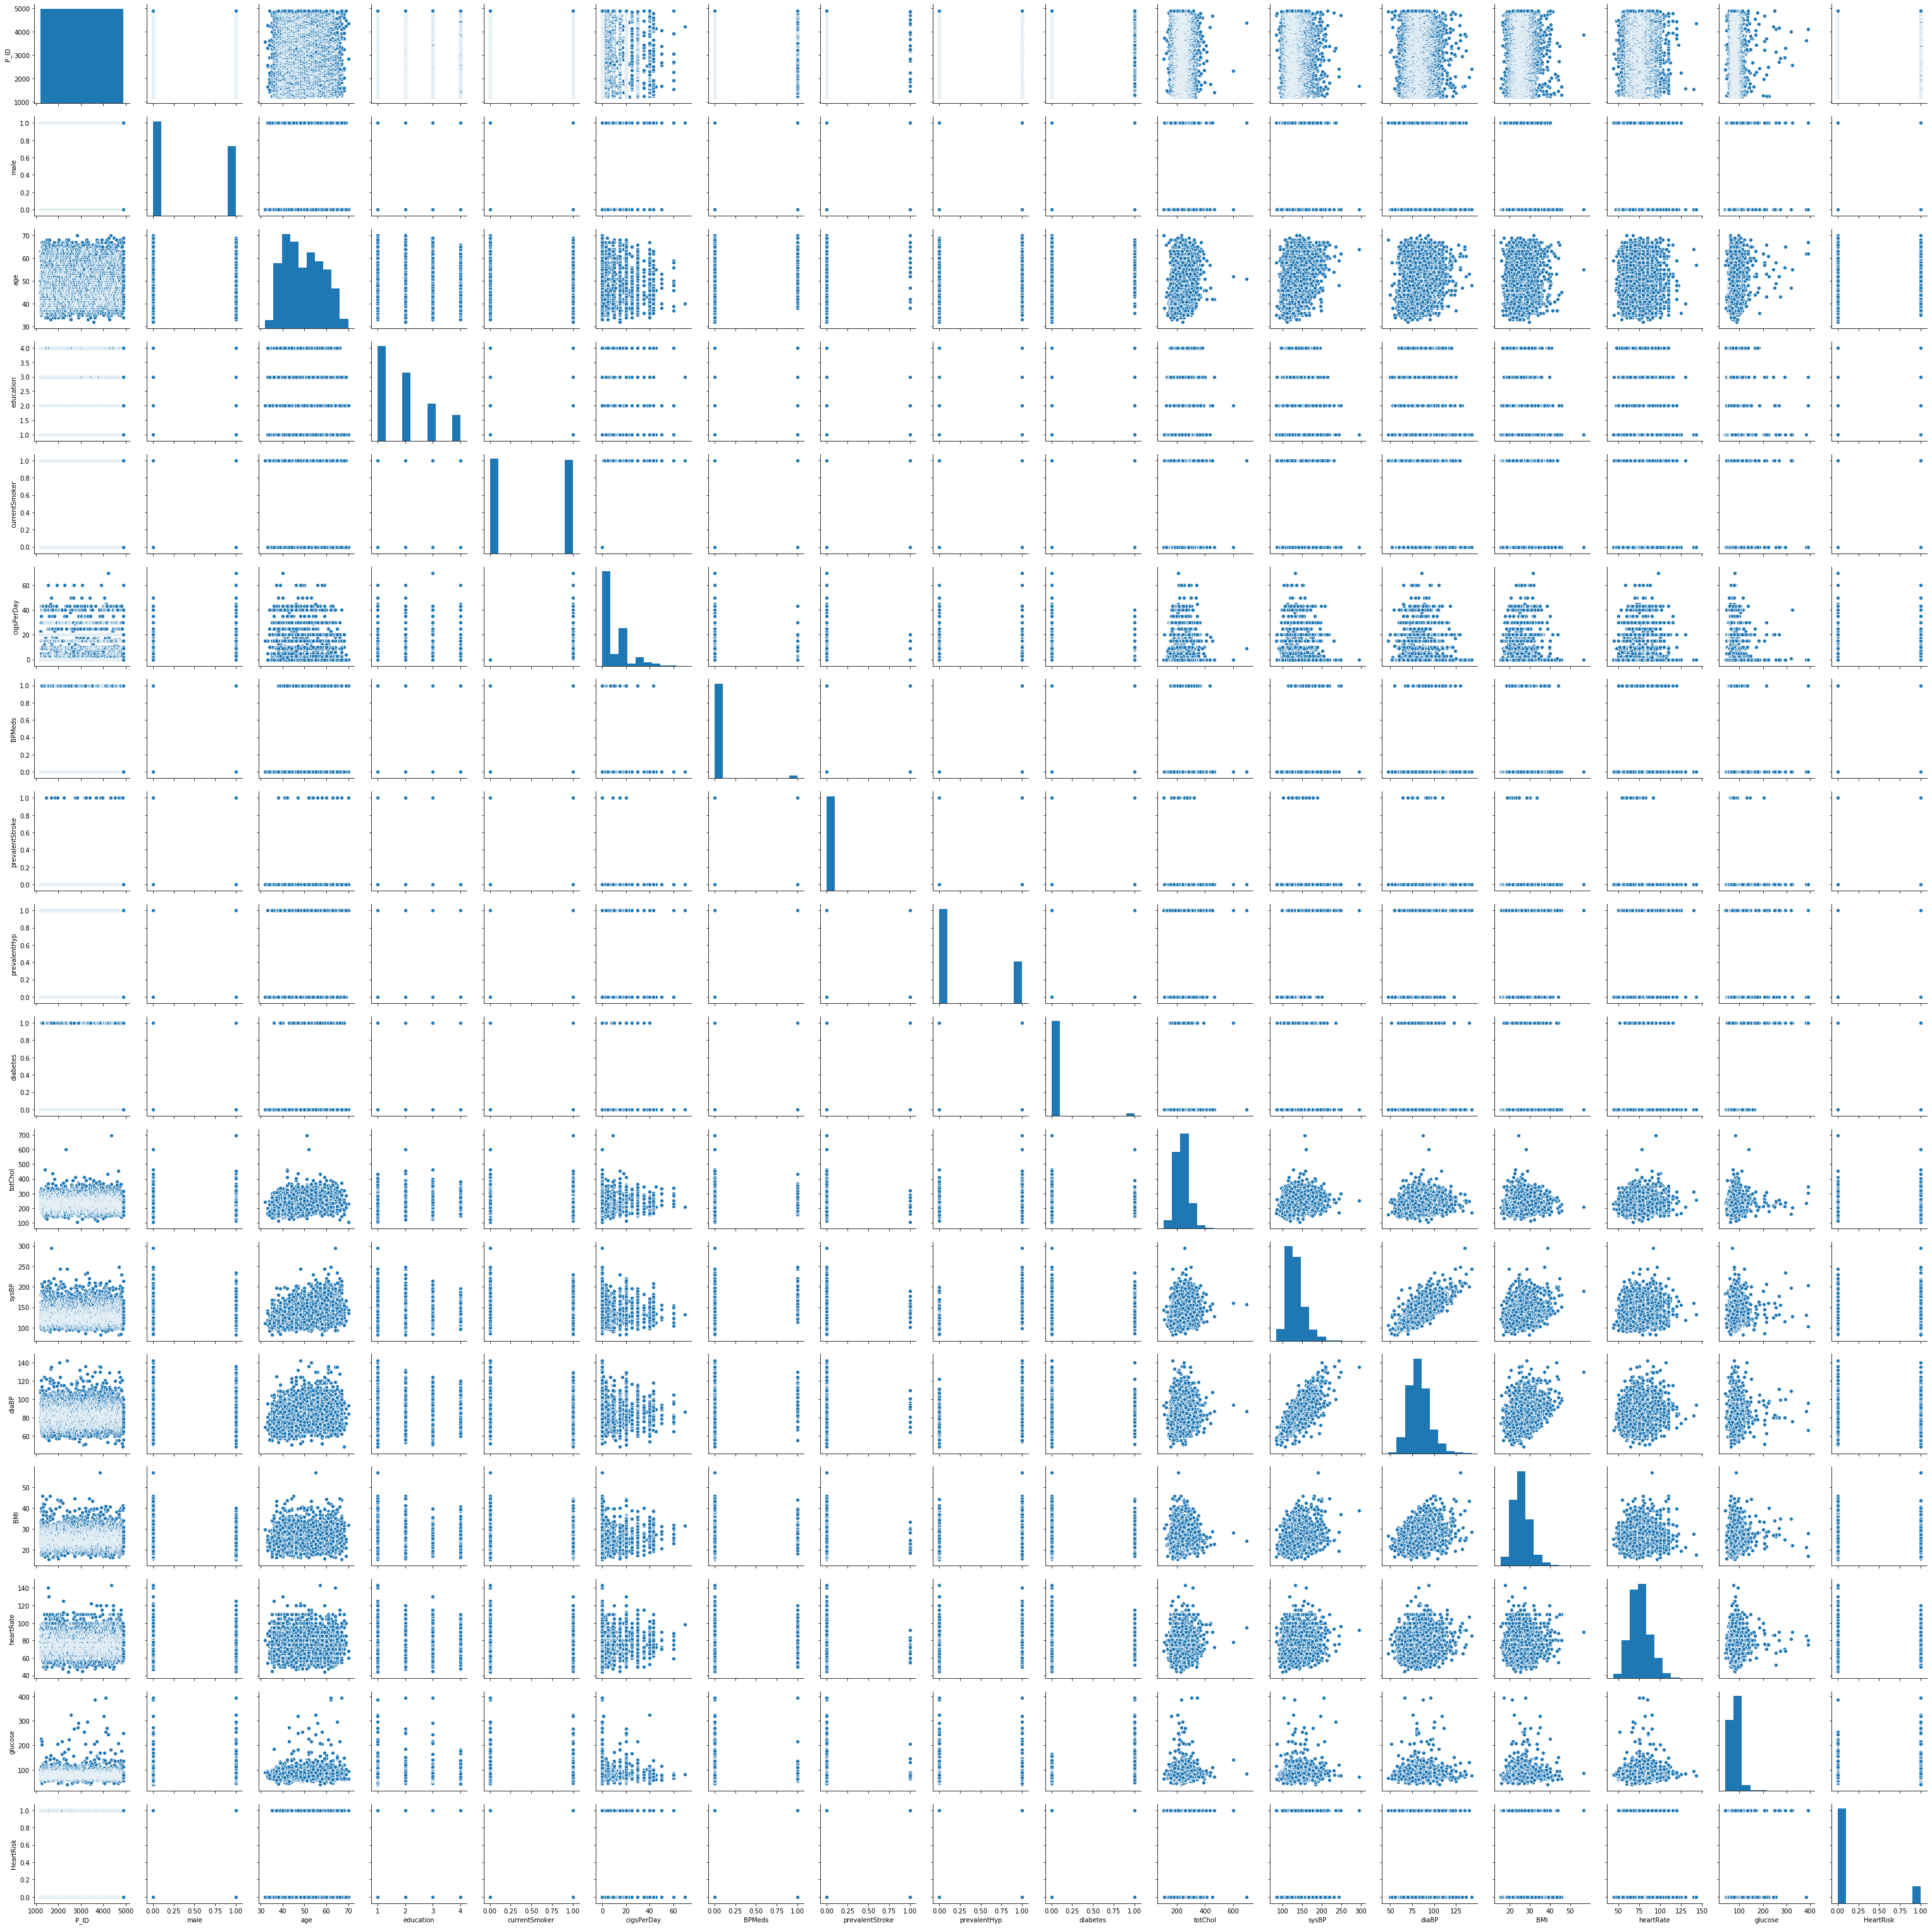

In [6]:
sns.pairplot(df)

In [8]:
var1=pd.isnull(df).sum()>0
print(var1)

P_ID               False
male               False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
HeartRisk          False
dtype: bool


In [9]:
df.cigsPerDay = df['cigsPerDay'].fillna(df.cigsPerDay.mean())
print(df['cigsPerDay'])

0        0.0
1        0.0
2       20.0
3       30.0
4       23.0
        ... 
3693     0.0
3694     0.0
3695    20.0
3696    40.0
3697    20.0
Name: cigsPerDay, Length: 3698, dtype: float64


In [10]:
df.cigsPerDay=pd.isnull(df.cigsPerDay).sum()>0
print(df.cigsPerDay)

0       False
1       False
2       False
3       False
4       False
        ...  
3693    False
3694    False
3695    False
3696    False
3697    False
Name: cigsPerDay, Length: 3698, dtype: bool


In [11]:
df1=df[df.BPMeds.isnull()]
print(df1.shape)

(46, 17)


In [12]:
df=df[df.BPMeds.notnull()] 
print(df.shape)

(3652, 17)


In [13]:
df1['BPMeds']=np.where(df1['sysBP']>140,1,0)
df=df.append(df1) 
print(df.shape)

(3698, 17)


C:\Users\Sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df.totChol = df.totChol.fillna(df.totChol.mean())


In [15]:
df.glucose = df.glucose.fillna(df.glucose.mean())


In [16]:
df.BMI = df.BMI.fillna(df.BMI.mean())


In [17]:
df.heartRate = df.heartRate.fillna(method = 'ffill')


In [18]:
df2=pd.isnull(df).sum()>0
print(df2)


P_ID               False
male               False
age                False
education           True
currentSmoker      False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
HeartRisk          False
dtype: bool


In [19]:
from sklearn.linear_model import LogisticRegression
x_train_data= pd.DataFrame(df.iloc[:,[1,2,4,5,6,7,8,9,10,11,12,13,14,15]])
y_train_data = pd.DataFrame(df.HeartRisk)

In [20]:
test_data=pd.read_excel('Dataset-2.xlsx')

In [21]:
NA_test_data=pd.isnull(test_data).sum()>0
print(NA_test_data)

P_ID               False
male               False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose             True
HeartRisk           True
dtype: bool


In [23]:
test_data.cigsPerDay = test_data['cigsPerDay'].fillna(test_data.cigsPerDay.mean())
df3=test_data[test_data.BPMeds.isnull()]
test_data=test_data[test_data.BPMeds.notnull()]
df3['BPMeds']=np.where(df3['sysBP']>140,1,0)
test_data=test_data.append(df3)
test_data.totChol = test_data.totChol.fillna(test_data.totChol.mean())
test_data.glucose = test_data.glucose.fillna(test_data.glucose.mean())
#NA_test_data=pd.isnull(test_data).sum()>0
#print(NA_test_data)
x_test_data= pd.DataFrame(test_data.iloc[:,[1,2,4,5,6,7,8,9,10,11,12,13,14,15]])


In [24]:
reg=LogisticRegression()
reg.fit(x_train_data,y_train_data.values.ravel())


C:\Users\Sony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
prediction = reg.predict(x_test_data)
print(prediction)
my_data=[prediction]


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 